In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ISLP import load_data
from statsmodels.stats.anova import anova_lm
from triton.language import dtype
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [15]:
plt.style.use('default')

In [16]:
Wage = load_data('Wage')
y = Wage['wage']

In [17]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(7), float64(2), int64(2)
memory usage: 115.5 KB


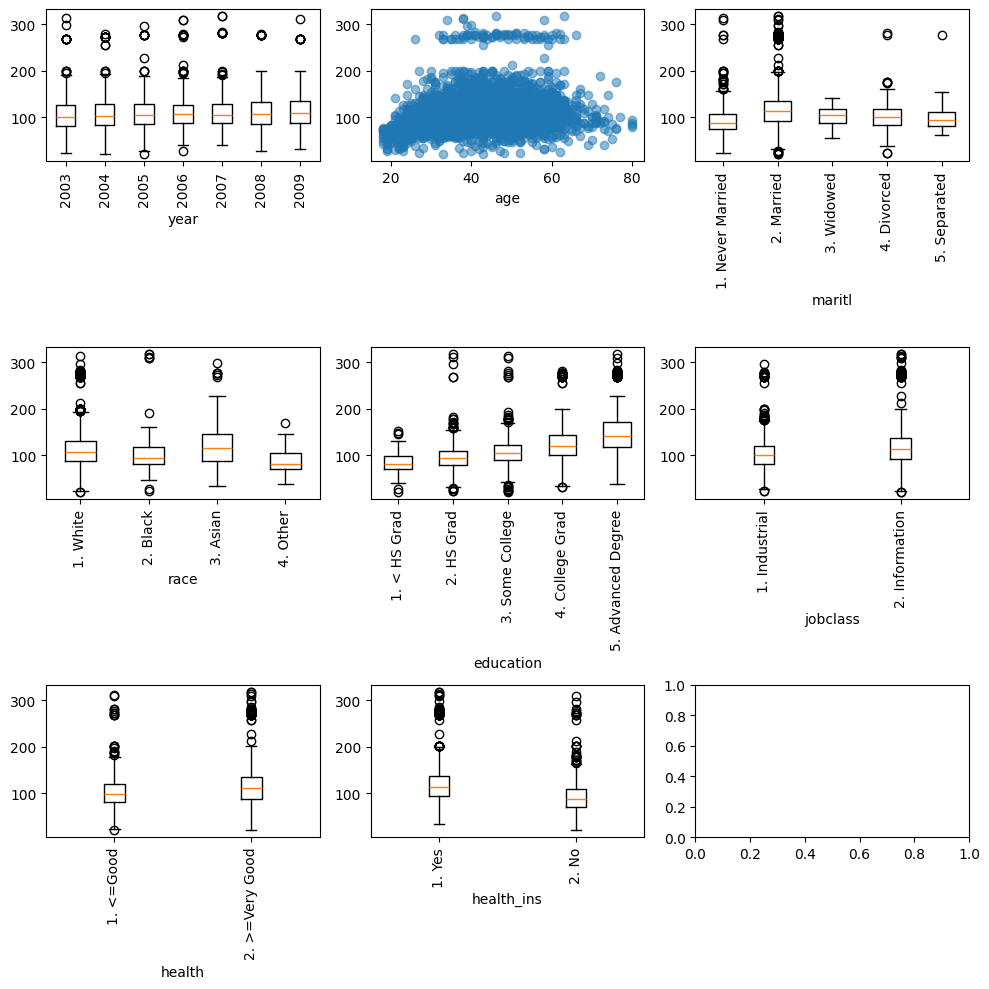

In [18]:
all_columns = Wage.columns.drop(["wage", "logwage", "region"])
axs = plt.subplots(3, 3, figsize=(10, 10))[1].flatten()

float_columns = ["age"]

for idx, colname in enumerate(all_columns):
    ax = axs[idx]
    if colname in float_columns:
        # numerical
        ax.scatter(Wage[colname], y, alpha=0.5)
        ax.set_xlabel(colname)
    else:
        boxes = {cat: y[Wage[colname] == cat] for cat in sorted(Wage[colname].unique())}
        ax.boxplot(boxes.values(), vert=True)
        ax.set_xticklabels(boxes.keys(), rotation=90)
        ax.set_xlabel(colname)

# plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [19]:
X_dummies = pd.get_dummies(Wage[['maritl', "education"]]).astype(int)
X_dummies.drop(["maritl_5. Separated", "education_5. Advanced Degree"], inplace=True, axis=1)
X_dummies.head(10)

X = pd.concat([Wage["age"], X_dummies], axis=1)
X.head()

,age,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,education_1. < HS Grad,education_2. HS Grad,education_3. Some College,education_4. College Grad
0,18,1,0,0,0,1,0,0,0
1,24,1,0,0,0,0,0,0,1
2,45,0,1,0,0,0,0,1,0
3,43,0,1,0,0,0,0,0,1
4,50,0,0,0,1,0,1,0,0


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3000 non-null   int64
 1   maritl_1. Never Married    3000 non-null   int64
 2   maritl_2. Married          3000 non-null   int64
 3   maritl_3. Widowed          3000 non-null   int64
 4   maritl_4. Divorced         3000 non-null   int64
 5   education_1. < HS Grad     3000 non-null   int64
 6   education_2. HS Grad       3000 non-null   int64
 7   education_3. Some College  3000 non-null   int64
 8   education_4. College Grad  3000 non-null   int64
dtypes: int64(9)
memory usage: 211.1 KB


In [21]:
pf = PolynomialFeatures(degree=3)
Xp = pd.DataFrame(pf.fit_transform(X[["age"]]), columns=pf.get_feature_names_out())

Xp = pd.concat([Xp, X.drop(["age"], axis=1)], axis=1)

Xp_names = pf.get_feature_names_out()
Xp_names

array(['1', 'age', 'age^2', 'age^3'], dtype=object)

In [22]:
Xp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   1                          3000 non-null   float64
 1   age                        3000 non-null   float64
 2   age^2                      3000 non-null   float64
 3   age^3                      3000 non-null   float64
 4   maritl_1. Never Married    3000 non-null   int64  
 5   maritl_2. Married          3000 non-null   int64  
 6   maritl_3. Widowed          3000 non-null   int64  
 7   maritl_4. Divorced         3000 non-null   int64  
 8   education_1. < HS Grad     3000 non-null   int64  
 9   education_2. HS Grad       3000 non-null   int64  
 10  education_3. Some College  3000 non-null   int64  
 11  education_4. College Grad  3000 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 281.4 KB


In [23]:
model = sm.OLS(y, Xp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 20 Dec 2025   Prob (F-statistic):          3.09e-227
Time:                        18:55:19   Log-Likelihood:                -14903.
No. Observations:                3000   AIC:                         2.983e+04
Df Residuals:                    2988   BIC:                         2.990e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
1                            51.3990     21.168      2.428      0.015       9.893      92.905
age                           4.7362      1.447      3.274      0.001       1.900       7.573
age^2                        -0.0676      0.033     -2.060      0.039      -0.132      -0.003
age^3                         0.0003      0.000      1.063      0.288      -0.000       0.001
maritl_1. Never Married      -7.4850      5.002     -1.496      0.135     -17.293       2.324
maritl_2. Married             6.2181      4.782      1.300      0.194      -3.158      15.594
maritl_3. Widowed            -8.4214      9.300     -0.906      0.365     -26.657       9.814
maritl_4. Divorced           -7.2634      5.314     -1.367      0.172     -17.683       3.156
education_1. < HS Grad      -62.0107      2.743    -22.611      0.000     -67.388     -56.633
education_2. HS Grad        -51.0284      2.043    -24.983      0.000     -55.033     -47.023
education_3. Some College   -38.4674      2.192    -17.546      0.000     -42.766     -34.169
education_4. College Grad   -24.0546      2.155    -11.160      0.000     -28.281     -19.828
==============================================================================
Omnibus:                     1053.887   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5883.748
Skew:                           1.565   Prob(JB):                         0.00
Kurtosis:                       9.105   Cond. No.                     3.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

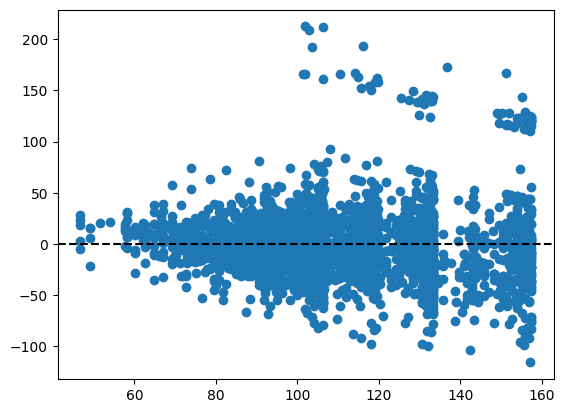

In [24]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='k', linestyle='--')

In [26]:
Xage_p = PolynomialFeatures(degree=3).fit_transform(X[["age"]])
age_model = sm.OLS(y, Xage_p).fit()

anova_lm(age_model, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2996.0,4.777674e+06,0.0,NaN,NaN,NaN
1,2988.0,3.625481e+06,8.0,1.152193e+06,118.699854,6.904118e-173
